In [ ]:
!unzip -u "/content/drive/MyDrive/UMich/Fuzzy/archive.zip" -d "/content/drive/MyDrive/UMich/Fuzzy/Cassava_Disease_Data"

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy==1.24.4

  Obtaining dependency information for numpy==1.24.4 from https://files.pythonhosted.org/packages/d8/ec/ebef2f7d7c28503f958f0f8b992e7ce606fb74f9e891199329d5f5f87404/numpy-1.24.4-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ksaks\\anaconda3\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
train_dir = 'C:/Users/ksaks/Documents/Masters Stuff/Fuzzy Systems/Cassava_Plant_Diseases/train'
test_dir = 'C:/Users/ksaks/Documents/Masters Stuff/Fuzzy Systems/Cassava_Plant_Diseases/test'

In [3]:
batch_size = 32
img_size = (224, 224)
num_classes = len(os.listdir(train_dir)) # Ensure this correctly counts the number of class folders

In [4]:
num_classes

5

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.15
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(test_dir,
                                                        target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
                                                       )

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 14552 images belonging to 5 classes.
Found 639 images belonging to 5 classes.
Found 4280 images belonging to 5 classes.


In [7]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

                                                                                                  
 block_3_expand_BN (BatchNo  (None, 56, 56, 144)          576       ['block_3_expand[0][0]']      
 rmalization)                                                                                     
                                                                                                  
 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)

                                                                                                  
 block_6_depthwise (Depthwi  (None, 14, 14, 192)          1728      ['block_6_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_p

                                                                    ']                            
                                                                                                  
 block_9_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_9_project[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_

 block_13_expand (Conv2D)    (None, 14, 14, 576)          55296     ['block_12_add[0][0]']        
                                                                                                  
 block_13_expand_BN (BatchN  (None, 14, 14, 576)          2304      ['block_13_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
          

 block_16_expand_relu (ReLU  (None, 7, 7, 960)            0         ['block_16_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_16_depthwise (Depthw  (None, 7, 7, 960)            8640      ['block_16_expand_relu[0][0]']
 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)     

In [8]:
# Define the path to save the model weights
checkpoint_filepath = 'C:/Users/ksaks/Documents/Masters Stuff/Fuzzy Systems/Cassava_Plant_Diseases/best_model.weights.h5'

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

# Train the model with EarlyStopping and ModelCheckpoint callbacks
history = model.fit(
    train_generator,
    epochs=10,
    verbose=1,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/10


455/455 [==============================] - ETA: 0s - loss: 0.9104 - accuracy: 0.6735
Epoch 1: val_loss improved from inf to 0.89981, saving model to C:/Users/ksaks/Documents/Masters Stuff/Fuzzy Systems/Cassava_Plant_Diseases\best_model.weights.h5
455/455 [==============================] - 240s 521ms/step - loss: 0.9104 - accuracy: 0.6735 - val_loss: 0.8998 - val_accuracy: 0.6886
Epoch 2/10
455/455 [==============================] - ETA: 0s - loss: 0.8121 - accuracy: 0.7058
Epoch 2: val_loss improved from 0.89981 to 0.83739, saving model to C:/Users/ksaks/Documents/Masters Stuff/Fuzzy Systems/Cassava_Plant_Diseases\best_model.weights.h5
455/455 [==============================] - 234s 514ms/step - loss: 0.8121 - accuracy: 0.7058 - val_loss: 0.8374 - val_accuracy: 0.6808
Epoch 3/10
455/455 [==============================] - ETA: 0s - loss: 0.7738 - accuracy: 0.7163
Epoch 3: val_loss improved from 0.83739 to 0.80892, saving model to C:/Users/ksaks/Documents/Masters Stuff/Fuzzy

In [10]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

134/134 [==============================] - 42s 313ms/step - loss: 0.8377 - accuracy: 0.6932
Test Loss: 0.8377
Test Accuracy: 0.6932


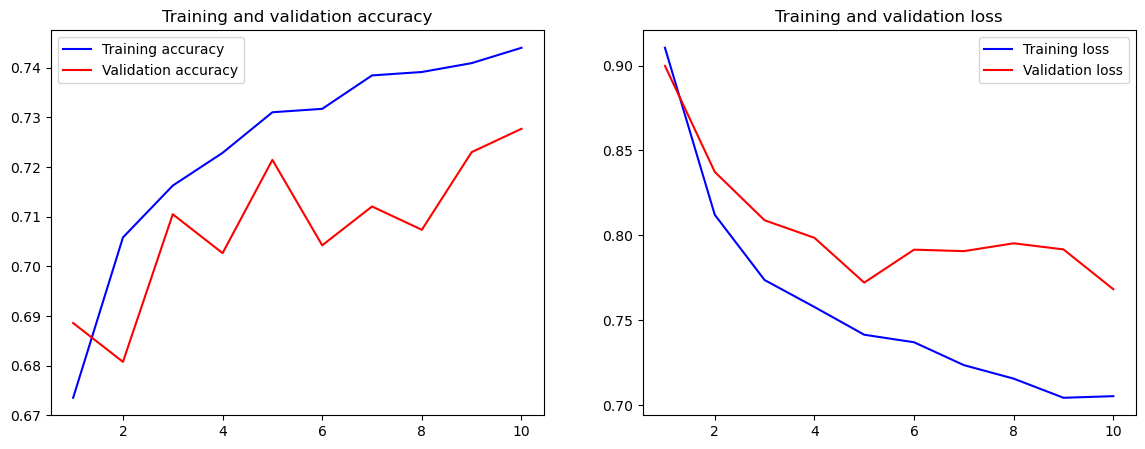

In [11]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_history(history)

134/134 [==============================] - 39s 287ms/step
Classification Report
                                     precision    recall  f1-score   support

     Cassava Bacterial Blight (CBB)       0.48      0.41      0.45       217
Cassava Brown Streak Disease (CBSD)       0.59      0.43      0.50       438
         Cassava Green Mottle (CGM)       0.46      0.39      0.42       477
       Cassava Mosaic Disease (CMD)       0.87      0.81      0.84      2632
                            Healthy       0.40      0.71      0.51       516

                           accuracy                           0.69      4280
                          macro avg       0.56      0.55      0.54      4280
                       weighted avg       0.72      0.69      0.70      4280



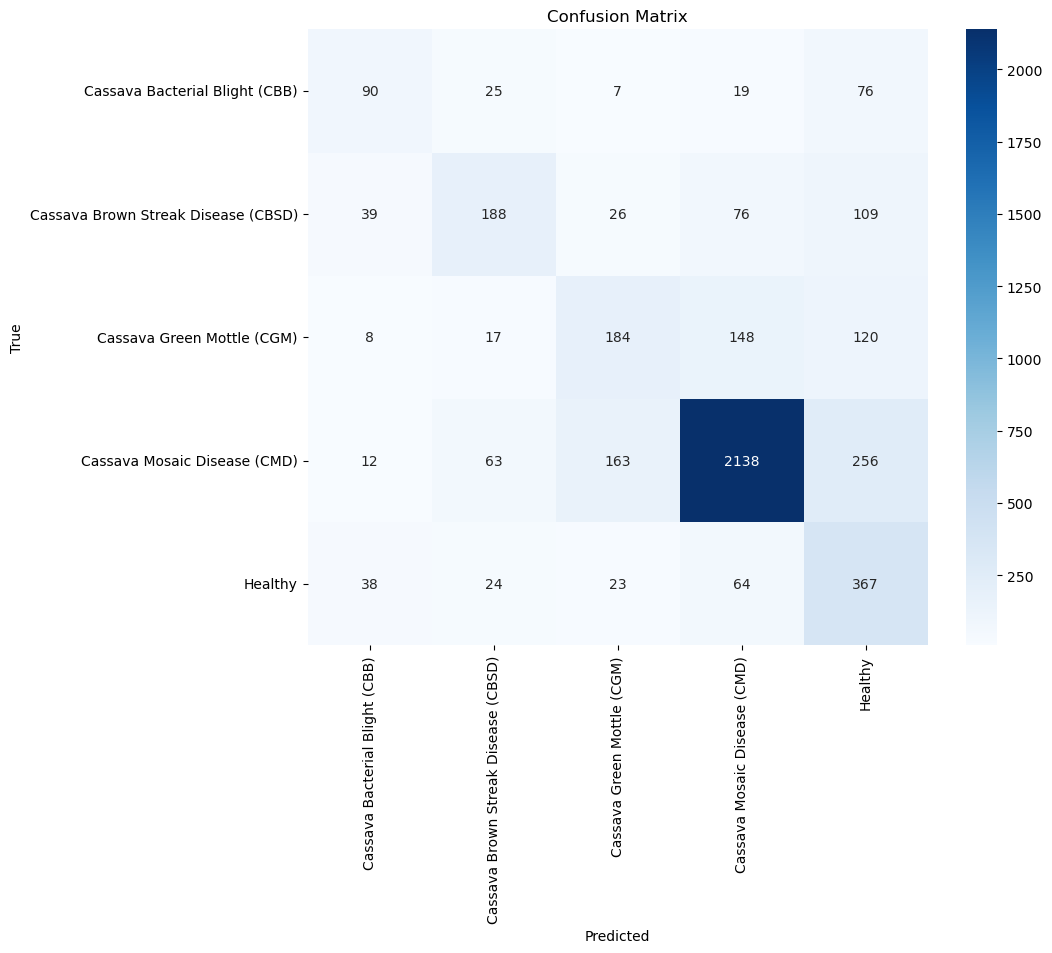

In [12]:
# Get the ground truth labels and predicted labels
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# Print classification report
class_labels = list(test_generator.class_indices.keys())
print("Classification Report")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


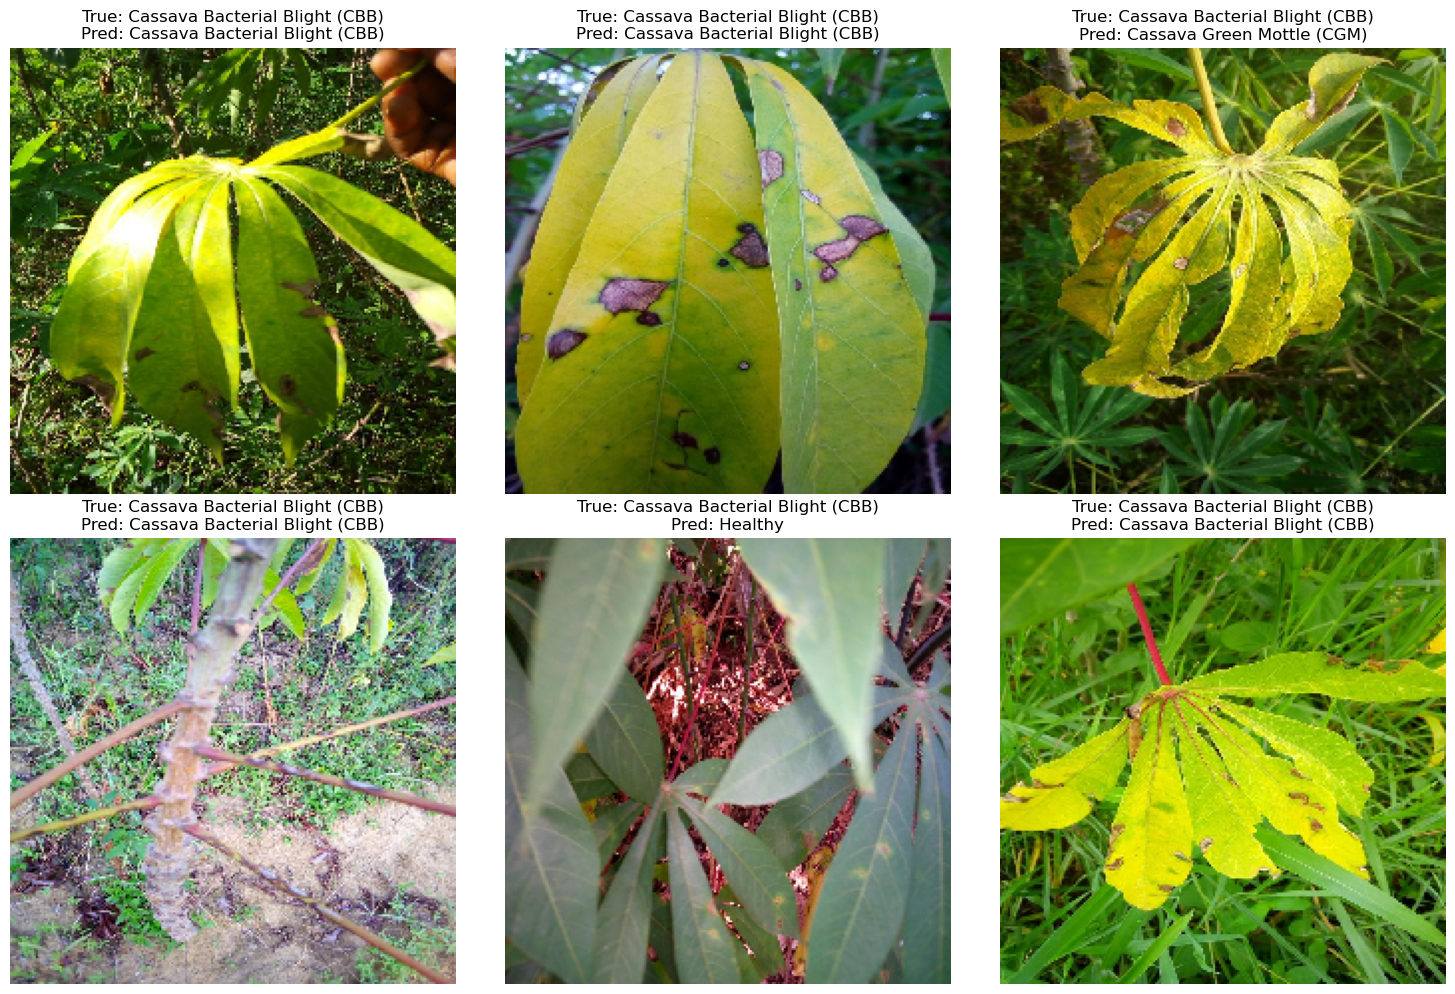

In [13]:
# Display sample images with true and predicted labels
def show_sample_images_with_predictions(generator, true_labels, predicted_labels, class_labels, num_samples=6):
    fig, axes = plt.subplots(2, num_samples // 2, figsize=(15, 10))
    axes = axes.flatten()
    for img, ax, true_label, pred_label in zip(generator[0][0][:num_samples], axes, true_labels[:num_samples], predicted_labels[:num_samples]):
        img = (img * 255).astype(np.uint8)  # Reverse normalization for display
        ax.imshow(img)
        ax.set_title(f'True: {class_labels[true_label]}\nPred: {class_labels[pred_label]}')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Show sample images
show_sample_images_with_predictions(test_generator, y_true, y_pred, class_labels)